In [1]:
#Model to find certication eligible candidate using logistic regression.

#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Getting Datafiles
test=pd.read_csv('F:/Data science material/Additional - Projects/certifications holder/Database/Input files/test_wF0Ps6O.csv')
train=pd.read_csv('F:/Data science material/Additional - Projects/certifications holder/Database/Input files/train_HK6lq50.csv')

In [3]:
final_df=pd.concat([test,train],axis=0,ignore_index=True)

In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104496 entries, 0 to 104495
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         104496 non-null  object 
 1   program_id                 104496 non-null  object 
 2   program_type               104496 non-null  object 
 3   program_duration           104496 non-null  int64  
 4   test_id                    104496 non-null  int64  
 5   test_type                  104496 non-null  object 
 6   difficulty_level           104496 non-null  object 
 7   trainee_id                 104496 non-null  int64  
 8   gender                     104496 non-null  object 
 9   education                  104496 non-null  object 
 10  city_tier                  104496 non-null  int64  
 11  age                        64976 non-null   float64
 12  total_programs_enrolled    104496 non-null  int64  
 13  is_handicapped             10

In [5]:
final_df.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,104496.000000,104496.000000,104496.000000,104496.000000,64976.000000,104496.000000,104388.000000,73147.000000
mean,128.209386,90.937672,9846.168045,2.248478,36.478038,2.586223,2.397776,0.695408
std,6.892792,51.219793,5706.697072,1.011789,9.045325,1.238415,1.327130,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5041.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9648.500000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14555.250000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [6]:
#Displaying total no. of null values
total1=final_df.isnull().sum()
total2=final_df.isnull().count()
Missing_value=round(((total1/total2)*100),2)
Missing_value_df=pd.concat([total1, Missing_value], axis=1, keys=['Total', '%'])
Missing_value_df

,Total,%
id,0,0.00
program_id,0,0.00
program_type,0,0.00
program_duration,0,0.00
test_id,0,0.00
test_type,0,0.00
difficulty_level,0,0.00
trainee_id,0,0.00
gender,0,0.00
education,0,0.00


In [7]:
corr = final_df.corr()
corr

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
program_duration,1.000000,0.203368,0.149458,-0.024032,-0.019115,-0.005856,0.097955,0.003545
test_id,0.203368,1.000000,0.148954,-0.002392,-0.024096,-0.134765,0.326308,0.074568
trainee_id,0.149458,0.148954,1.000000,-0.011085,0.111596,-0.074000,0.029881,0.035900
city_tier,-0.024032,-0.002392,-0.011085,1.000000,-0.070272,0.017320,-0.049050,-0.068663
age,-0.019115,-0.024096,0.111596,-0.070272,1.000000,-0.070354,0.185237,0.073969
total_programs_enrolled,-0.005856,-0.134765,-0.074000,0.017320,-0.070354,1.000000,0.083041,-0.031695
trainee_engagement_rating,0.097955,0.326308,0.029881,-0.049050,0.185237,0.083041,1.000000,0.197383
is_pass,0.003545,0.074568,0.035900,-0.068663,0.073969,-0.031695,0.197383,1.000000


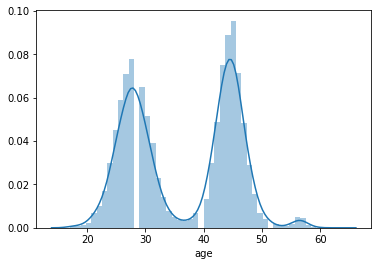

In [8]:
sns.distplot(final_df['age'],bins=50)

In [9]:
column=final_df.columns
for x in column:
    unique_values= len(np.unique(final_df[x],return_counts=False))
    print('Unique value of ' , x , ':' ,unique_values)

Unique value of  id : 104496
Unique value of  program_id : 22
Unique value of  program_type : 7
Unique value of  program_duration : 10
Unique value of  test_id : 188
Unique value of  test_type : 2
Unique value of  difficulty_level : 4
Unique value of  trainee_id : 19422
Unique value of  gender : 2
Unique value of  education : 5
Unique value of  city_tier : 4
Unique value of  age : 39565
Unique value of  total_programs_enrolled : 13
Unique value of  is_handicapped : 2
Unique value of  trainee_engagement_rating : 113
Unique value of  is_pass : 31351


In [10]:
final_df=final_df.drop(['id'],axis=1)

In [11]:
#filling empty values
final_df['age'] = final_df['age'].fillna(final_df.age.mean())
final_df['trainee_engagement_rating'] = final_df['trainee_engagement_rating'].fillna(final_df.trainee_engagement_rating.median())

In [12]:
final_df['age'] = final_df['age'].astype(float)
final_df.loc[final_df['age'] < 18, 'Categories'] = 'Children'
final_df.loc[(final_df['age'] >= 18) & (final_df['age'] <= 35), 'Categories'] = 'Young Adults'
final_df.loc[(final_df['age'] > 35) & (final_df['age'] <= 55), 'Categories'] = 'Middle-Aged Adults'
final_df.loc[final_df['age'] > 55, 'Categories'] = 'Older Adults'
final_df['Categories']
Age_Mapping = {'Children' : 1, 'Young Adults' : 2, 'Middle-Aged Adults' : 3, 'Older Adults' : 4}
final_df['New_Age'] = final_df['Categories'].map(Age_Mapping)

In [13]:
final_df=final_df.drop(['Categories','age','test_id','trainee_id'],axis=1)

In [14]:
Duration_Mapping={117 : 1, 120 : 2, 121 : 3, 122 : 4, 130 : 5, 131 : 6, 133 : 7, 134 : 8, 135 : 9, 136 : 10}
final_df['program_duration']=final_df['program_duration'].map(Duration_Mapping)

In [15]:
final_df=pd.get_dummies(final_df,columns=['difficulty_level','education','gender','program_id','program_type','test_type','is_handicapped'])

In [16]:
final_df['trainee_engagement_rating']=final_df['trainee_engagement_rating'].astype(int)

In [17]:
Test_data = final_df.iloc[:31349,:]
Train_data = final_df.iloc[31349:,:]

In [18]:
Final_test = Test_data.drop(['is_pass'],axis=1)
train_Target = Train_data['is_pass'].astype(int)
train_Predictors = Train_data.drop(['is_pass'],axis=1)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_Predictors, train_Target, test_size=0.25, random_state=30)

In [20]:
# Module Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [21]:
#Logistic Regression
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)

y_pred = LogReg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

C:\Users\Mari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 1305,  4234],
       [  879, 11869]], dtype=int64)

In [22]:
y_pred_LR = LogReg.predict_proba(x_test)[:,1]

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

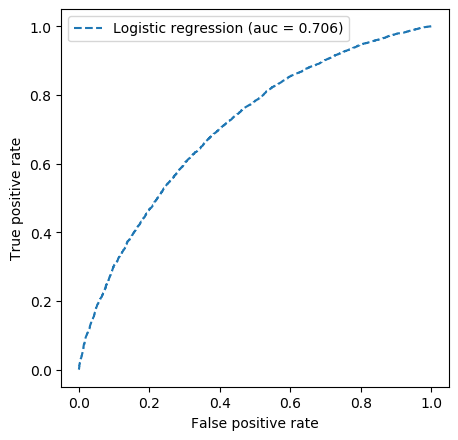

In [24]:
roc_auc_LR = roc_auc_score(y_test, y_pred_LR)
LR_fpr, LR_tpr, threshold = roc_curve(y_test, y_pred_LR)
auc_lr=auc(LR_fpr,LR_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(LR_fpr,LR_tpr,linestyle='--', label='Logistic regression (auc = %0.3f)' % auc_lr)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()
